In [5]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import proj3d
from scipy.stats import dirichlet

import os
import seaborn as sns

## Source: https://github.com/probml/pyprobml/blob/master/notebooks/book1/04/dirichlet_3d_spiky_plot.ipynb

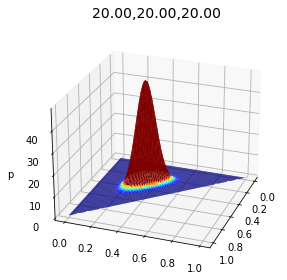

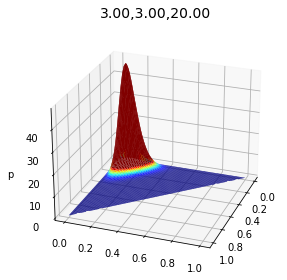

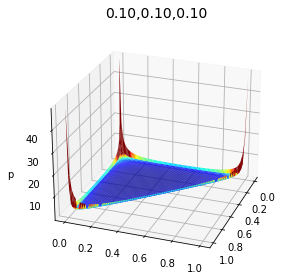

In [3]:
grain = 100  # 20 #how many points along each axis to plot
edgedist = 0.005  # 0.008 #How close to an extreme value of say [1,0,0] are we willing to plot.
weight = np.linspace(0, 1, grain)

# Most extreme corners of the sample space
Corner1 = np.array([1.0 - edgedist * 2, edgedist, edgedist])
Corner2 = np.array([edgedist, 1.0 - edgedist * 2, edgedist])
Corner3 = np.array([edgedist, edgedist, 1.0 - edgedist * 2])

# Probability density function that accepts 2D coordiantes
def dpdf(v1, v2, alphavec):
    if (v1 + v2) > 1:
        out = np.nan
    else:
        vec = v1 * Corner1 + v2 * Corner2 + (1.0 - v1 - v2) * Corner3
        out = dirichlet.pdf(vec, alphavec)
    return out


# Dirichlet parameter
alphas = [[20, 20, 20], [3, 3, 20], [0.1, 0.1, 0.1]]
for i in range(len(alphas)):
    alphavec = np.array(alphas[i])
    azim = 20
    probs = np.array([dpdf(v1, v2, alphavec) for v1 in weight for v2 in weight]).reshape(-1, grain)

    # fig = plt.figure(figsize=(20,15))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    X, Y = np.meshgrid(weight, weight)
    ax.plot_surface(Y, X, probs, cmap="jet", vmin=0, vmax=3, rstride=1, cstride=1, linewidth=0)
    ax.view_init(elev=25, azim=azim)
    ax.set_zlabel("p")
    ttl = ",".join(["{:0.2f}".format(d) for d in alphavec])
    ax.set_title(ttl, fontsize=14)
    alpha = int(np.round(alphavec[0] * 10))
    plt.tight_layout()
    plt.savefig("plots/dirSimplexAlpha{}Legible.png".format(alpha))
    plt.show()

if 0:
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(Y, X, probs, cmap="jet", vmin=0, vmax=3, rstride=1, cstride=1, linewidth=0)
    ax.view_init(elev=25, azim=200)
    ax.set_zlabel("p")
    ttl = ",".join(["{:0.2f}".format(d) for d in alphavec])
    ax.set_title(ttl)
    alpha = np.round(alphavec[0] * 10)
    plt.savefig("plots/alpha.pdf")
    plt.show()
     

## Second example

### source: https://github.com/probml/pyprobml/blob/master/notebooks/book1/04/dirichlet_samples_plot.ipynb

Samples from a 5-dimensional symmetric Dirichlet distribution for different parameter values. (a) α = (0.1, . . . , 0.1). This results in very sparse distributions, with many 0s. (b) α = (1, . . . , 1). This results in more uniform (and dense) distributions.

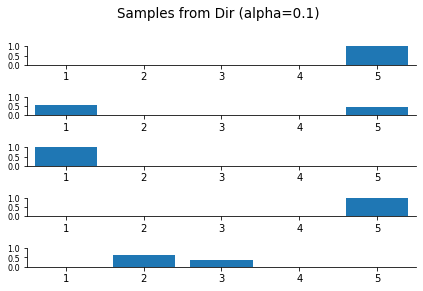

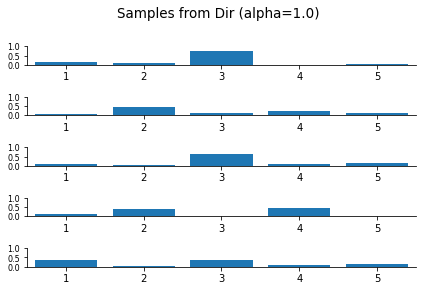

In [6]:
np.random.seed(0)

NSamples = 5
X = np.arange(1, 6)

# This function generators a few bar graphs showing samples generated from a
# Dirichlet distribution with a param vector with elements = alpha.
def MakeDirSampleFig(alpha):
    AlphaVec = np.repeat(alpha, NSamples)
    samps = np.random.dirichlet(AlphaVec, NSamples)
    fig, ax = plt.subplots(NSamples)
    fig.suptitle("Samples from Dir (alpha=" + str(alpha) + ")", y=1, fontsize=13.5)
    fig.tight_layout()

    for i in range(NSamples):
        ax[i].bar(X, samps[i, :], align="center")
        ax[i].set_ylim([0, 1])
        ax[i].yaxis.set_ticks([0, 0.5, 1])
        ax[i].set_xlim([min(X) - 0.5, max(X) + 0.5])
        ax[i].tick_params(axis="y", which="major", labelsize=8)
    plt.draw()
    SaveN = "plots/dirSample" + str(int(np.round(10 * alpha))) + ".pdf"
    sns.despine()
    plt.savefig(SaveN)


MakeDirSampleFig(0.1)
MakeDirSampleFig(1.0)

plt.show()